# Data Analysis of Dazubi Data

In [2]:
# Datenanalysis & handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# AutoML
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Matplotlib style
plt.style.use('ggplot')

# Inteactive Plots 
import plotly.express as px

In [49]:
df = pd.read_csv("../data/dazubi_grouped_berufe.csv", index_col=0)

In [4]:
# overview of the dataset
print("DataFrame Shape:", df.shape)
print("\n Spalten und Datentypen:")
print(df.dtypes)

# overview of missing values
print("\n Anzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# percentage of missing values
print("\n Prozentualer Anteil fehlender Werte:")
missing_percent = df.isnull().mean().round(4) * 100
print(missing_percent[missing_percent > 0])

# print the first few rows of the DataFrame
print("\n Vorschau auf die Daten:")
display(df.head())

DataFrame Shape: (77993, 40)

 Spalten und Datentypen:
Unnamed: 0                                                                 int64
Jahr                                                                       int64
Region                                                                    object
Beruf_clean                                                               object
Deutsche Männer                                                          float64
Deutsche Frauen                                                          float64
Ausländer/-innen Männer                                                  float64
Ausländer/-innen Frauen                                                  float64
Höchster allgemeinbildender Schulabschluss ohne Hauptschulabschluss      float64
Höchster allgemeinbildender Schulabschluss mit Hauptschulabschluss       float64
Höchster allgemeinbildender Schulabschluss Realschulabschluss            float64
Höchster allgemeinbildender Schulabschluss Studienbere

,Unnamed: 0,Jahr,Region,Beruf_clean,Deutsche Männer,Deutsche Frauen,Ausländer/-innen Männer,Ausländer/-innen Frauen,Höchster allgemeinbildender Schulabschluss ohne Hauptschulabschluss,Höchster allgemeinbildender Schulabschluss mit Hauptschulabschluss,Höchster allgemeinbildender Schulabschluss Realschulabschluss,Höchster allgemeinbildender Schulabschluss Studienberechtigung,Höchster allgemeinbildender Schulabschluss nicht zuzuordnen,davon (Mehrfachnennung möglich): BQM,davon (Mehrfachnennung möglich): BVM,davon (Mehrfachnennung möglich): BVJ,davon (Mehrfachnennung möglich): BGJ,davon (Mehrfachnennung möglich): BFS,darunter: Neuabschlüsse in Teilzeitberufsausbildungen Männer,darunter: Neuabschlüsse in Teilzeitberufsausbildungen Frauen,darunter: Zugehörigkeit der Ausbildungsstätte zum öffentlichen Dienst,darunter: überwiegend öffentlich finanziert,im Alter von: 16 und jünger,im Alter von: 17.0,im Alter von: 18.0,im Alter von: 19.0,im Alter von: 20.0,im Alter von: 21.0,im Alter von: 22.0,im Alter von: 23.0,im Alter von: 24 bis 39,im Alter von: 40 und älter,Vorzeitige Vertragslösungen Insgesamt,davon gelöst: innerhalb der Probezeit (max. 4 Monate),"davon gelöst: nach der Probezeit, innerhalb der ersten 12 Monate",davon gelöst: nach 13 bis 24 Monaten,davon gelöst: nach 25 bis 36 Monaten,davon gelöst: nach mehr als 36 Monaten,Vorzeitige Vertragslösungen Deutsche,Vorzeitige Vertragslösungen Ausländer/-innen
0,0,2010,Baden-Württemberg,Anlagenmechaniker/-in,309.0,3.0,21.0,0.0,0.0,48.0,39.0,3.0,0.0,0.0,0.0,3.0,3.0,12.0,0.0,0.0,0.0,0.0,18.0,24.0,18.0,9.0,6.0,3.0,3.0,3.0,3.0,0.0,12.0,0.0,3.0,3.0,3.0,3.0,12.0,0.0
1,1,2010,Baden-Württemberg,"Anlagenmechaniker/-in für Sanitär-, Heizungs- ...",3141.0,30.0,414.0,0.0,27.0,777.0,393.0,30.0,0.0,15.0,9.0,66.0,51.0,543.0,0.0,0.0,3.0,36.0,210.0,327.0,249.0,165.0,99.0,57.0,39.0,24.0,54.0,0.0,234.0,57.0,72.0,66.0,30.0,6.0,195.0,39.0
2,2,2010,Baden-Württemberg,Asphaltbauer/-in,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,Baden-Württemberg,Aufbereitungsmechaniker/-in FR Feuerfeste und ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2010,Baden-Württemberg,Aufbereitungsmechaniker/-in FR Naturstein,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Vertragsloesung by year

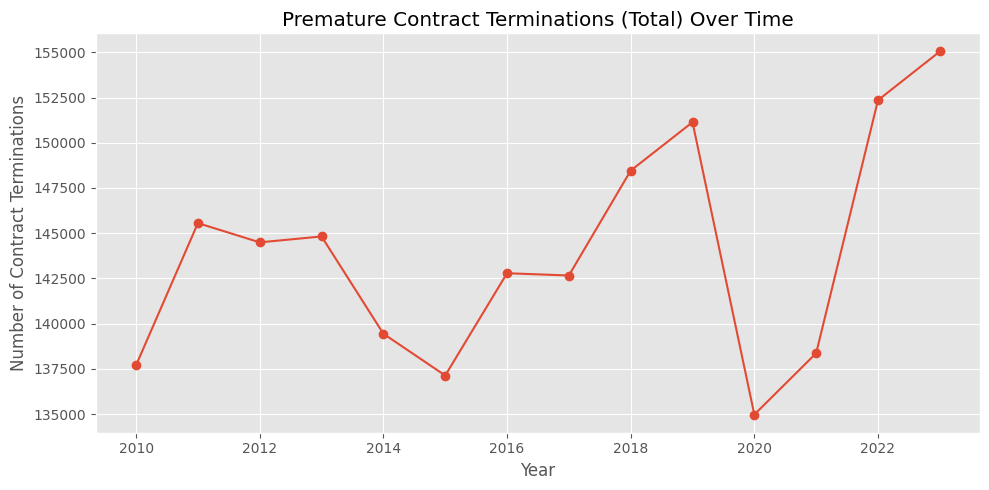

In [85]:
# Group by 'Jahr' and 'Vorzeitige Vertragslösungen Insgesamt'
abbruch_gesamt = df.groupby("Jahr")["Vorzeitige Vertragslösungen Insgesamt"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(abbruch_gesamt["Jahr"], abbruch_gesamt["Vorzeitige Vertragslösungen Insgesamt"], marker='o')

plt.title("Premature Contract Terminations (Total) Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Contract Terminations")
plt.grid(True)
plt.tight_layout()
plt.show()

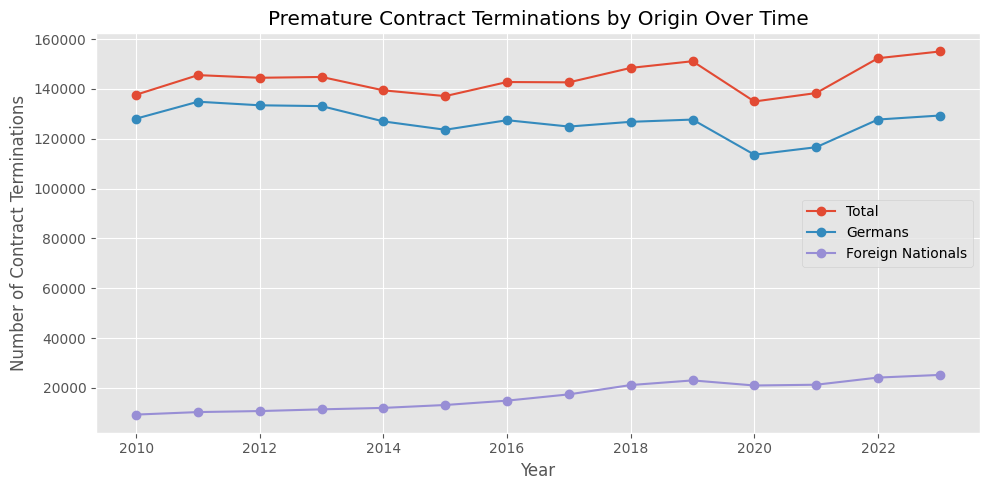

In [83]:
# Group by 'Jahr' and all three categories of 'Vorzeitige Vertragslösungen'
abbruch_herkunft = df.groupby("Jahr")[[
    "Vorzeitige Vertragslösungen Insgesamt",
    "Vorzeitige Vertragslösungen Deutsche",
    "Vorzeitige Vertragslösungen Ausländer/-innen"
]].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(abbruch_herkunft["Jahr"], abbruch_herkunft["Vorzeitige Vertragslösungen Insgesamt"], label="Total", marker='o')
plt.plot(abbruch_herkunft["Jahr"], abbruch_herkunft["Vorzeitige Vertragslösungen Deutsche"], label="Germans", marker='o')
plt.plot(abbruch_herkunft["Jahr"], abbruch_herkunft["Vorzeitige Vertragslösungen Ausländer/-innen"], label="Foreign Nationals", marker='o')

plt.title("Premature Contract Terminations by Origin Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Contract Terminations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Early Contract Terminations by Origin Over Time

The line chart shows the development of early contract terminations in Germany's vocational training system from 2010 to 2023, broken down by origin: total, German nationals, and non-German apprentices.

---

## Key Observations:

- The total number of early terminations remained relatively stable between **2010 and 2019**, with a slight upward trend.
- A **clear drop** can be seen in **2020**, likely due to the **COVID-19 pandemic**, followed by a recovery in subsequent years.
- Among the groups:
  - **German apprentices** consistently account for the **majority** of contract terminations.
  - **Non-German apprentices** show a **steady increase** over time — their dropout numbers more than **doubled from 2010 to 2023**.
  
---

## Insights:

- The **growing dropout numbers among non-German apprentices** may indicate increasing participation in vocational training — but also suggest challenges with integration or support systems.
- Despite fluctuations in the total, the **gap between German and non-German dropout numbers persists**, though it is **slowly narrowing**.
- The post-2020 rise suggests that **structural challenges** returned quickly after the pandemic disruptions.

---

## Recommendations:

- **Targeted support** for foreign apprentices may help reduce dropout rates (language assistance, mentorship, cultural onboarding).
- Monitor **post-pandemic trends** to understand if certain support systems failed or recovered unevenly.
- Consider additional breakdowns by **region, gender or profession** to identify high-risk clusters.


## Difference in state

In [10]:
# new column for total apprentices
df["Gesamt Azubis"] = (
    df["Deutsche Männer"] + df["Deutsche Frauen"] +
    df["Ausländer/-innen Männer"] + df["Ausländer/-innen Frauen"]
)

In [11]:
# Grouping by region 
abbruch_region = df.groupby("Region")[[
    "Vorzeitige Vertragslösungen Insgesamt", 
    "Gesamt Azubis"
]].sum().reset_index()

# Calculate the dropout rate
abbruch_region["Abbruchquote (%)"] = (
    abbruch_region["Vorzeitige Vertragslösungen Insgesamt"] / abbruch_region["Gesamt Azubis"]
) * 100

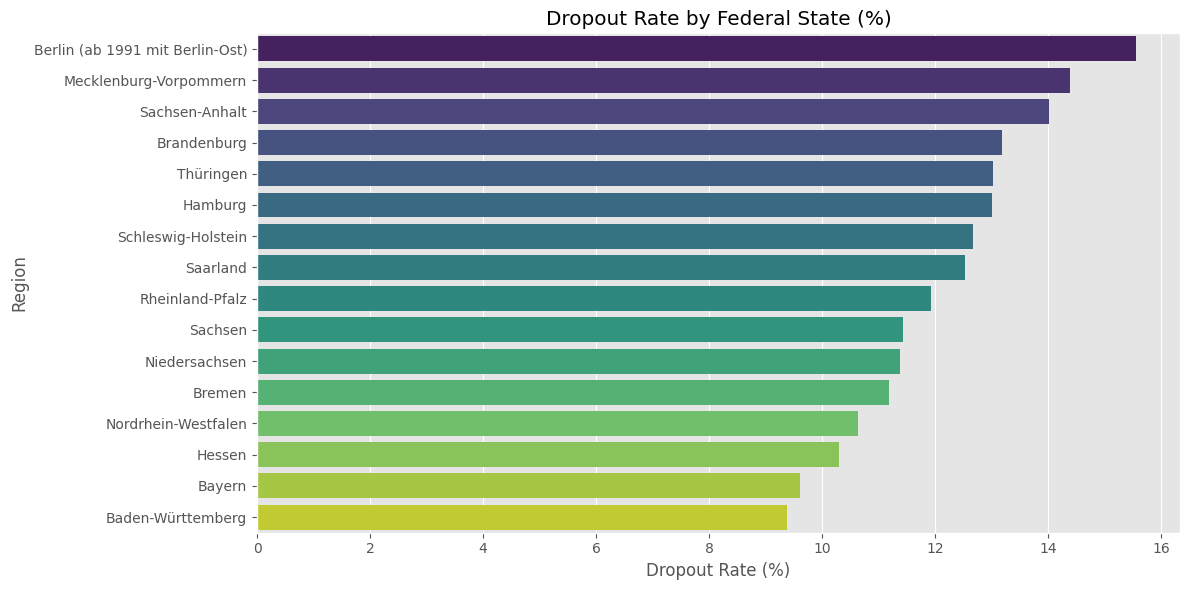

In [81]:
# sort the DataFrame by 'Abbruchquote (%)' in descending order
abbruch_region_sorted = abbruch_region.sort_values("Abbruchquote (%)", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=abbruch_region_sorted, x="Abbruchquote (%)", y="Region", palette="viridis")

plt.title("Dropout Rate by Federal State (%)")
plt.xlabel("Dropout Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Interpretation: Dropout Rate by Federal State (Germany)

The bar chart displays the **estimated apprenticeship dropout rate (%)** across German federal states.

---

## Key Observations:

- **Berlin** has the highest dropout rate at **nearly 16%**, followed closely by **Mecklenburg-Vorpommern** and **Sachsen-Anhalt**.
- These top regions are all located in **eastern Germany**, suggesting that regional disparities still persist in vocational training systems, possibly due to:
  - Economic differences
  - Structural labor market challenges
  - Limited availability of dual training positions or support services

- **Baden-Württemberg**, **Bayern**, and **Hessen** have the **lowest dropout rates**, all below **10%**.
  - These are economically strong states with high-quality training infrastructure and lower youth unemployment rates.

---

## Insights:

- The map reveals a **clear East–West divide** in dropout behavior.
- Policymakers should consider **region-specific interventions**, such as:
  - Improved counseling during training
  - Financial or structural support for companies in eastern states
  - Focused programs to improve training quality and retention in high-risk regions

---

## ext Steps (Optional):

- Cross-tab with **profession types by region**
- Compare dropout trends **over time** by state
- Overlay with **youth unemployment rates** or **company size distributions**


## Difference by age

In [75]:
# calculate new age groups
df["under 18"] = df["im Alter von: 16 und jünger"] + df["im Alter von: 17.0"]
df["18 to 20"] = df["im Alter von: 18.0"] + df["im Alter von: 19.0"] + df["im Alter von: 20.0"]
df["21 to 24"] = df["im Alter von: 21.0"] + df["im Alter von: 22.0"] + df["im Alter von: 23.0"]
df["25 to 39"] = df["im Alter von: 24 bis 39"]
df["40 and older"] = df["im Alter von: 40 und älter"]

In [79]:
# sum up the new age groups
alter_summe = pd.DataFrame({
    "under 18": df["under 18"].sum(),
    "18 to 20": df["18 to 20"].sum(),
    "21 to 24": df["21 to 24"].sum(),
    "25 to 39": df["25 to 39"].sum(),
    "40 and older": df["40 and older"].sum()
}, index=["Anzahl Azubis"]).T.reset_index()

alter_summe.columns = ["Altersgruppe", "Anzahl Azubis"]

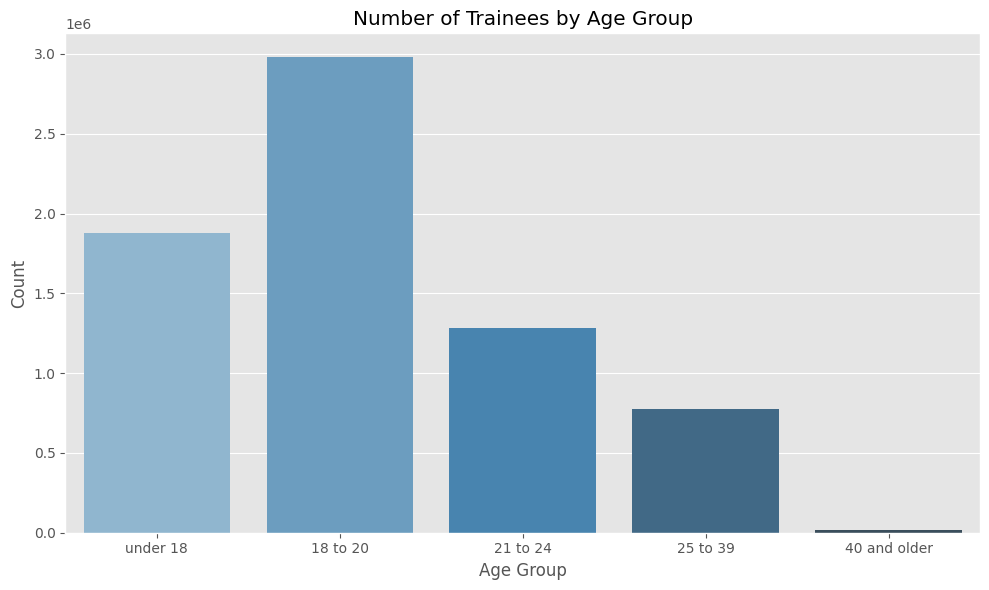

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=alter_summe, x="Altersgruppe", y="Anzahl Azubis", palette="Blues_d")

plt.title("Number of Trainees by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Estimated dropout in each age group

In [16]:
# sum of azubis in each age group
df["Azubi_gesamt_alter"] = df[["unter 18", "18 bis 20", "21 bis 24", "25 bis 39", "40 und älter"]].sum(axis=1)

In [17]:
# Estimated values: Share of the age group × total number of early contract terminations
for gruppe in ["unter 18", "18 bis 20", "21 bis 24", "25 bis 39", "40 und älter"]:
    df[f"Abbrüche geschätzt: {gruppe}"] = (
        (df[gruppe] / df["Azubi_gesamt_alter"]) * df["Vorzeitige Vertragslösungen Insgesamt"]
    ).fillna(0)  # NaN with 0 

In [ ]:
# Apprentices in each age group
azubis_gesamt = df[["unter 18", "18 bis 20", "21 bis 24", "25 bis 39", "40 und älter"]].sum()

# estimated early contract terminations in each age group
abbrueche_gesamt = df[[
    "Abbrüche geschätzt: unter 18",
    "Abbrüche geschätzt: 18 bis 20",
    "Abbrüche geschätzt: 21 bis 24",
    "Abbrüche geschätzt: 25 bis 39",
    "Abbrüche geschätzt: 40 und älter"
]].sum()

In [ ]:
# combine the results into a summary DataFrame
summary = pd.DataFrame({
    "Altersgruppe": ["unter 18", "18 bis 20", "21 bis 24", "25 bis 39", "40 und älter"],
    "Azubis gesamt": azubis_gesamt.values,
    "Vertragslösungen geschätzt": abbrueche_gesamt.values
})

# calculate the dropout rate for each age group
summary["Dropout-Rate (%)"] = (summary["Vertragslösungen geschätzt"] / summary["Azubis gesamt"]) * 100

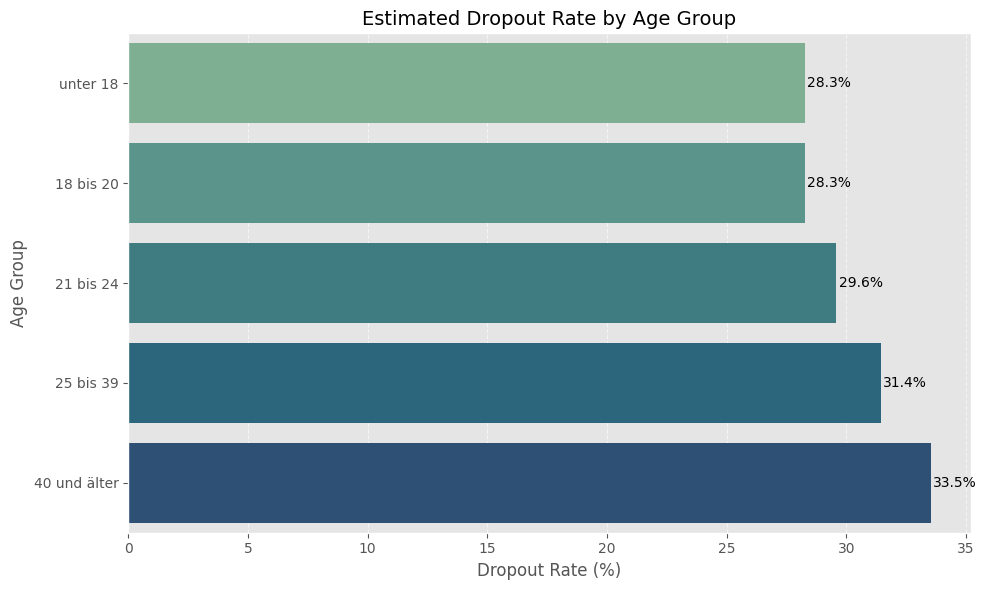

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x="Dropout-Rate (%)", y="Altersgruppe", palette="crest")

plt.title("Estimated Dropout Rate by Age Group", fontsize=14)
plt.xlabel("Dropout Rate (%)", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# print the values on the bars
for index, value in enumerate(summary["Dropout-Rate (%)"]):
    plt.text(value + 0.1, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.show()

# Estimated Dropout Rate by Age Group

The bar chart illustrates the estimated dropout rate for apprentices across different age groups. Here's what the data reveals:

---

## Key Observations:

- **Dropout rates increase with age**:
  - Apprentices **under 18** and those aged **18–20** both show a dropout rate of **28.3%**.
  - The rate **gradually increases** in older groups:
    - **21–24**: 29.6%
    - **25–39**: 31.4%
    - **40 and older**: 33.5%

- The **highest dropout rate** is among apprentices **aged 40 and older**, suggesting that older individuals may face greater challenges in vocational training — such as:
  - Balancing work and family responsibilities
  - Adapting to structured learning environments
  - Lack of peer group or age-appropriate support

- The **lowest dropout rates** are observed among **younger apprentices (< 21)**, which may indicate:
  - More flexible life situations
  - Higher institutional support (e.g. school-to-vocational transitions)
  - Possibly lower opportunity costs to exit

---

## Insights:

- **Age clearly influences** the likelihood of early contract termination in vocational training.
- **Targeted support strategies** may be especially important for older apprentices.
- Policymakers and training institutions could develop **age-specific retention measures** to better address varying needs across generations.

## Difference by job

In [24]:
# new column for total apprentices
df["Gesamt Azubis"] = (
    df["Deutsche Männer"] + df["Deutsche Frauen"] +
    df["Ausländer/-innen Männer"] + df["Ausländer/-innen Frauen"]
)

In [25]:
# Ggrouping and aggregating by 'Beruf_clean'
beruf_summary = df.groupby("Beruf_clean")[[
    "Gesamt Azubis",
    "Vorzeitige Vertragslösungen Insgesamt"
]].sum().reset_index()

In [26]:
# perform the calculation for dropout rate
beruf_summary["Dropout-Rate (%)"] = (
    beruf_summary["Vorzeitige Vertragslösungen Insgesamt"] / beruf_summary["Gesamt Azubis"]
) * 100

# just keep the rows where 'Gesamt Azubis' is greater than 0
beruf_summary = beruf_summary[beruf_summary["Gesamt Azubis"] > 0]

In [27]:
# Top & Bottom 10
top10 = beruf_summary.sort_values("Dropout-Rate (%)", ascending=False).head(10)
bottom10 = beruf_summary.sort_values("Dropout-Rate (%)", ascending=True).head(10)

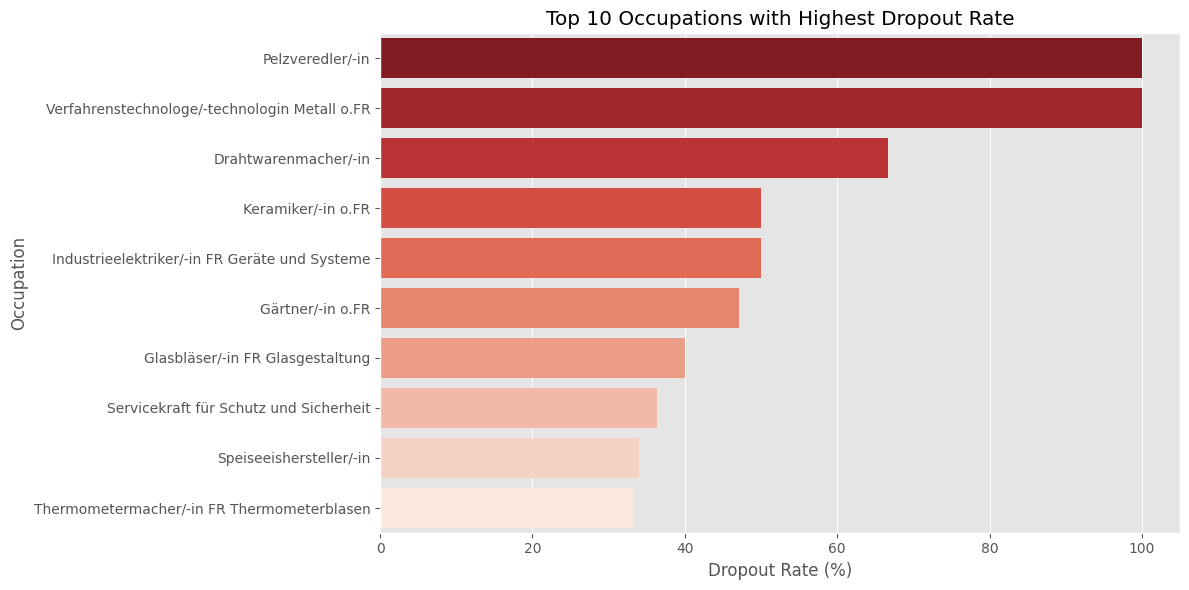

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Dropout-Rate (%)", y="Beruf_clean", palette="Reds_r")

plt.title("Top 10 Occupations with Highest Dropout Rate")
plt.xlabel("Dropout Rate (%)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

# Top 10 Occupations with the Highest Dropout Rate

The bar chart presents the ten professions in Germany with the **highest estimated dropout rates** in vocational training programs.

---

## Key Observations:

- The top two professions – **Pelzveredler/-in** (Fur Processor) and **Verfahrenstechnologe/-technologin Metall** (Process Technologist in Metal) – show **extreme dropout rates of 100%**.
  - These may be **statistical outliers** due to very low apprenticeship numbers.
  - Alternatively, they may reflect professions in decline or with highly unfavorable conditions.

- Other high-risk occupations include:
  - **Drahtwarenmacher/-in** (Wire Product Maker): ~66%
  - **Keramiker/-in**, **Industrieelektriker/-in**, and **Gärtner/-in**: between **45–50%**
  - **Servicekraft für Schutz und Sicherheit** (Security Personnel): ~36%
  - **Speiseeishersteller/-in** (Ice Cream Maker): ~34%
  - **Thermometermacher/-in** (Thermometer Glassblower): ~33%

---

## Insights:

- Many of these occupations are either:
  - **Physically demanding**
  - **Poorly paid**
  - **Highly specialized with low prestige**
  
- Some of these fields are also **niche or declining professions**, making it harder for apprentices to envision long-term career prospects.

- The presence of **technical roles** (e.g. electronics, metalwork) alongside **service and craft jobs** suggests a **broad vulnerability across domains**.

---

## Recommendations:

- Further investigation is needed into why these dropout rates are so high:
  - Small training company sizes?
  - Lack of mentorship or support?
  - Poor working conditions?

- Consider **targeted retention strategies**:
  - Improved onboarding
  - More realistic job previews
  - Better school-to-work transition support in these fields

- Exclude professions with **very few apprentices** from direct comparison, or indicate their sample size to avoid misinterpretation.

In [30]:
print(bottom10)

                                           Beruf_clean  Gesamt Azubis  \
440                              Musikalienhändler/-in            3.0   
337                  Keramiker/-in FR Scheibentöpferei           21.0   
336                        Keramiker/-in FR Dekoration            3.0   
335                        Keramiker/-in FR Baukeramik            3.0   
185                             Figurenkeramformer/-in           42.0   
579      Thermometermacher/-in FR Thermometerjustieren            6.0   
621  Verfahrensmechaniker/-in in der Steine- und Er...           60.0   
489                Prüftechnologe/-technologin Keramik          168.0   
62   Bürsten- und Pinselmacher/-in FR Bürstenherste...           24.0   
307                                      Kartograf/-in           60.0   

     Vorzeitige Vertragslösungen Insgesamt  Dropout-Rate (%)  
440                                    0.0               0.0  
337                                    0.0               0.0  
336    

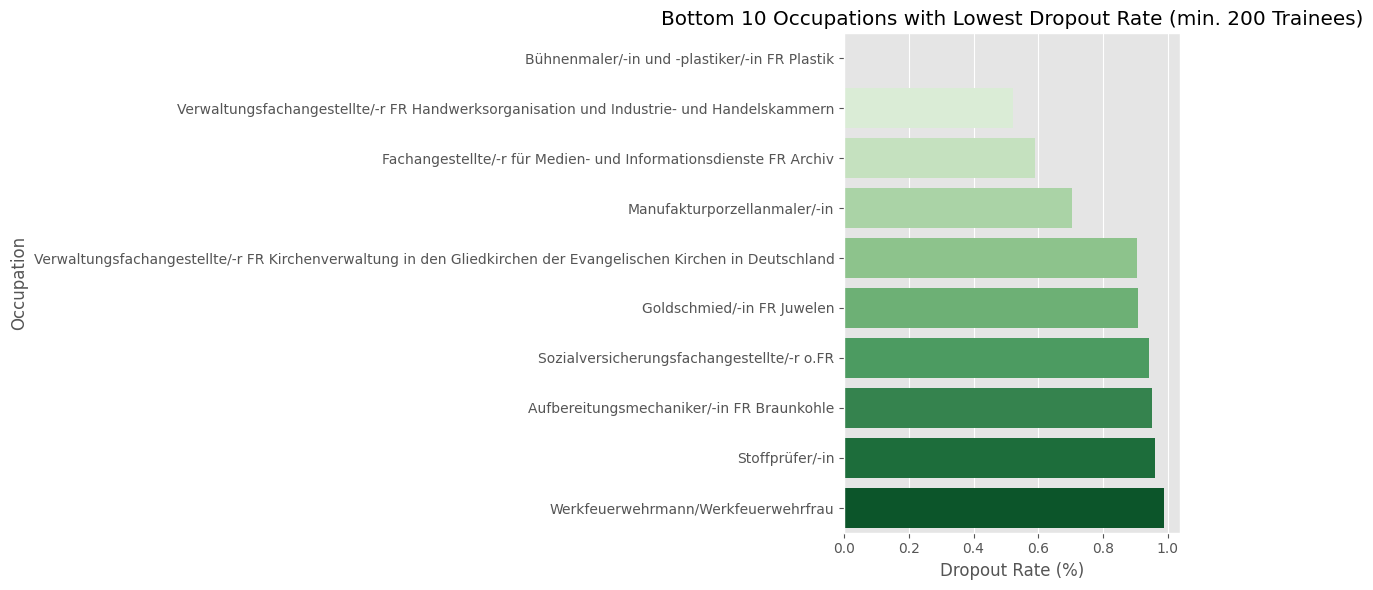

In [72]:
# jobs with at least 200 apprentices
filtered = beruf_summary[beruf_summary["Gesamt Azubis"] >= 200]

# Bottom 10 of jobs with at least 200 apprentices
bottom10 = filtered.sort_values("Dropout-Rate (%)", ascending=True).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom10, x="Dropout-Rate (%)", y="Beruf_clean", palette="Greens")

plt.title("Bottom 10 Occupations with Lowest Dropout Rate (min. 200 Trainees)")
plt.xlabel("Dropout Rate (%)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

# Bottom 10 Occupations with the Lowest Dropout Rate (min. 200 Apprentices)

The bar chart shows the ten apprenticeship occupations in Germany with the **lowest estimated dropout rates**, filtered to include only those with **at least 200 apprentices**.

---

## Key Observations:

- All listed professions have **extremely low dropout rates**, ranging between **0.4% and 1.0%**.
- The lowest dropout rate is observed in **Werkfeuerwehrmann/-frau** (Industrial Firefighter), followed closely by **Stoffprüfer/-in** (Textile Tester) and **Aufbereitungsmechaniker/-in in FR Braunkohle** (Mineral Processing Technician in Brown Coal).

- Other low-risk professions include:
  - **Sozialversicherungsfachangestellte/-r** (Social Insurance Clerk)
  - **Goldschmied/-in FR Juwelen** (Goldsmith – Jewelry)
  - **Verwaltungsfachangestellte/-r** (Administrative Clerk) in various specializations

---

## Insights:

- Many of these occupations are in **public administration**, **regulated technical fields**, or **specialized trades**.
- Such fields may offer:
  - **Stable working conditions**
  - **Clear career paths**
  - **Strong institutional support and supervision**
  - **Selective entry criteria**, which may help prevent mismatches

- The presence of jobs from **public sector and niche industries** suggests that **training context and job stability** significantly influence retention.

---

## Recommendations:

- Identify **best practices** in training quality and onboarding from these low-dropout professions.
- Explore whether **smaller training companies**, which are common in high-dropout fields, can adopt similar structures or mentoring systems.
- Use this list as a **benchmark** when analyzing high-risk professions — what makes these careers more resilient?

## Differences by graduation

In [ ]:
# define the columns for school graduation
schulabschluss_spalten = [
    "Höchster allgemeinbildender Schulabschluss mit Hauptschulabschluss",
    "Höchster allgemeinbildender Schulabschluss Realschulabschluss",
    "Höchster allgemeinbildender Schulabschluss Studienberechtigung",
    "Höchster allgemeinbildender Schulabschluss nicht zuzuordnen"
]

# new column for total apprentices by school graduation
df["Azubi_gesamt_schulabschluss"] = df[schulabschluss_spalten].sum(axis=1)

# propotional distribution of early contract terminations by school graduation
df["Abbrüche geschätzt: Hauptschulabschluss"] = (
    (df["Höchster allgemeinbildender Schulabschluss mit Hauptschulabschluss"] / df["Azubi_gesamt_schulabschluss"])
    * df["Vorzeitige Vertragslösungen Insgesamt"]
).fillna(0)

df["Abbrüche geschätzt: Realschulabschluss"] = (
    (df["Höchster allgemeinbildender Schulabschluss Realschulabschluss"] / df["Azubi_gesamt_schulabschluss"])
    * df["Vorzeitige Vertragslösungen Insgesamt"]
).fillna(0)

df["Abbrüche geschätzt: Studienberechtigung"] = (
    (df["Höchster allgemeinbildender Schulabschluss Studienberechtigung"] / df["Azubi_gesamt_schulabschluss"])
    * df["Vorzeitige Vertragslösungen Insgesamt"]
).fillna(0)

df["Abbrüche geschätzt: zuzuordnen"] = (
    (df["Höchster allgemeinbildender Schulabschluss nicht zuzuordnen"] / df["Azubi_gesamt_schulabschluss"])
    * df["Vorzeitige Vertragslösungen Insgesamt"]
).fillna(0)

In [ ]:
# labels for the school graduation categories
labels = [
    "Hauptschulabschluss",
    "Realschulabschluss",
    "Studienberechtigung",
    "Nicht zuzuordnen"
]

# sum up the values for each school graduation category
spalten_azubis = schulabschluss_spalten
spalten_abbrueche = [
    "Abbrüche geschätzt: Hauptschulabschluss",
    "Abbrüche geschätzt: Realschulabschluss",
    "Abbrüche geschätzt: Studienberechtigung",
    "Abbrüche geschätzt: zuzuordnen"
]

azubi_werte = df[spalten_azubis].sum().values
abbruch_werte = df[spalten_abbrueche].sum().values

# combine the results into a summary DataFrame
schul_summary = pd.DataFrame({
    "Schulabschluss": labels,
    "Azubis gesamt": azubi_werte,
    "Vertragslösungen geschätzt": abbruch_werte
})

# calculate the dropout rate for each school graduation category
schul_summary["Dropout-Rate (%)"] = (
    schul_summary["Vertragslösungen geschätzt"] / schul_summary["Azubis gesamt"]
) * 100

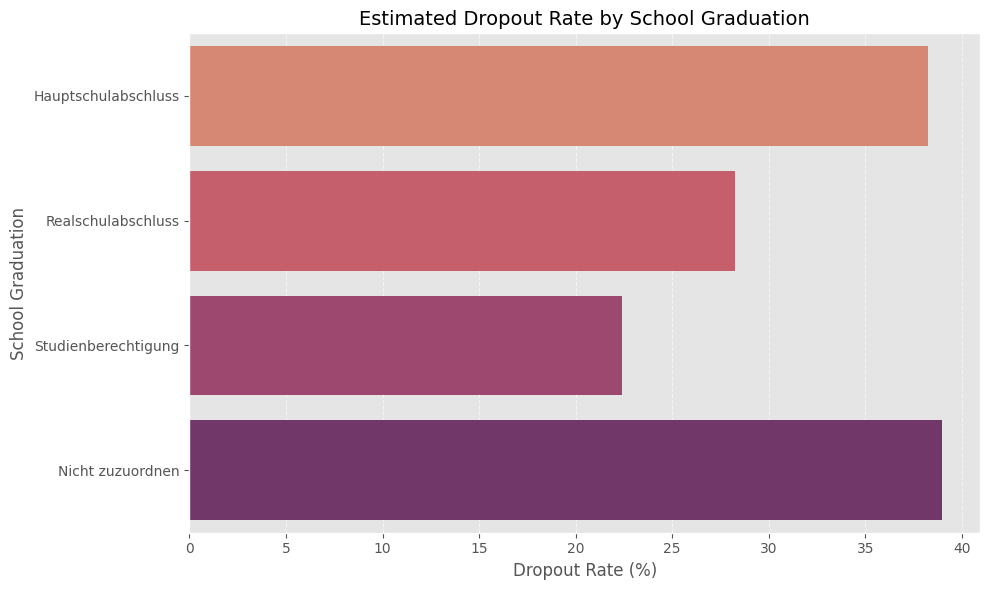

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=schul_summary, x="Dropout-Rate (%)", y="Schulabschluss", palette="flare")

plt.title("Estimated Dropout Rate by School Graduation", fontsize=14)
plt.xlabel("Dropout Rate (%)")
plt.ylabel("School Graduation")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Estimated Dropout Rate by School Qualification

The bar chart presents the **estimated dropout rates** in vocational training based on the highest general school qualification of apprentices in Germany.

---

## Key Observations:

- Apprentices with a **Hauptschulabschluss** (lower secondary education) have the **highest dropout rate**, nearing **38%**.
- Those with a **Realschulabschluss** (intermediate secondary education) show a **moderate dropout rate** of around **28%**.
- Apprentices with a **Studienberechtigung** (higher education entrance qualification) have the **lowest dropout rate**, at just above **22%**.
- The **"Nicht zuzuordnen"** category (unclassifiable or unknown educational background) exhibits the **highest overall rate** at **almost 40%**, though this may reflect data quality issues or external qualifications.

---

## Insights:

- There is a **clear inverse relationship** between education level and dropout risk:
  - The **higher** the educational attainment, the **lower** the dropout likelihood.
- Apprentices with weaker school qualifications may:
  - Lack foundational skills needed for the demands of vocational training
  - Have fewer career alternatives, leading to more "trial placements"
  - Be less confident in structured learning environments

- The very high rate among **"not classifiable"** cases suggests a **need for better documentation** and potentially targeted support for individuals with non-standard educational paths (e.g. migrants or school dropouts).

---

## Recommendations:

- Provide **early diagnostic assessments and learning support** for apprentices with lower school qualifications.
- Strengthen **transitional programs** and mentorship for vulnerable groups.
- Improve data capture for the "not classifiable" group to enable more precise interventions.

## Probezeit vs. späterer Abbruch

In [68]:
# Sum up all values for each dropout time point
zeitpunkte = {
    "Probation Period (≤ 4 Monate)": df["davon gelöst: innerhalb der Probezeit (max. 4 Monate)"].sum(),
    "Month 5–12": df["davon gelöst: nach der Probezeit, innerhalb der ersten 12 Monate"].sum(),
    "Month 13–24": df["davon gelöst: nach 13 bis 24 Monaten"].sum(),
    "Month 25–36": df["davon gelöst: nach 25 bis 36 Monaten"].sum(),
    "After 36 month": df["davon gelöst: nach mehr als 36 Monaten"].sum()
}

# change into DataFrame
zeit_df = pd.DataFrame(list(zeitpunkte.items()), columns=["Abbruchzeitpunkt", "Anzahl"])

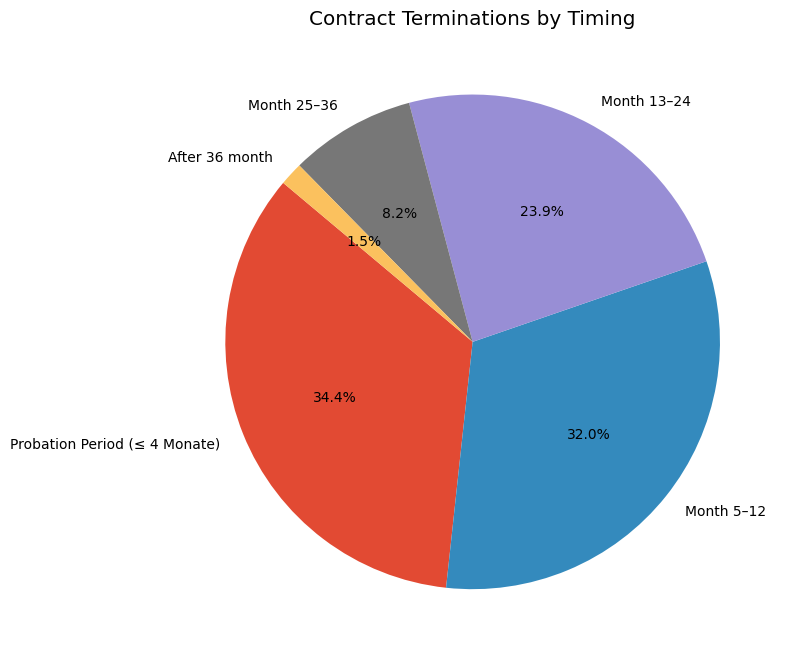

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(zeit_df["Anzahl"], labels=zeit_df["Abbruchzeitpunkt"], autopct="%1.1f%%", startangle=140)
plt.title("Contract Terminations by Timing")
plt.tight_layout()
plt.show()

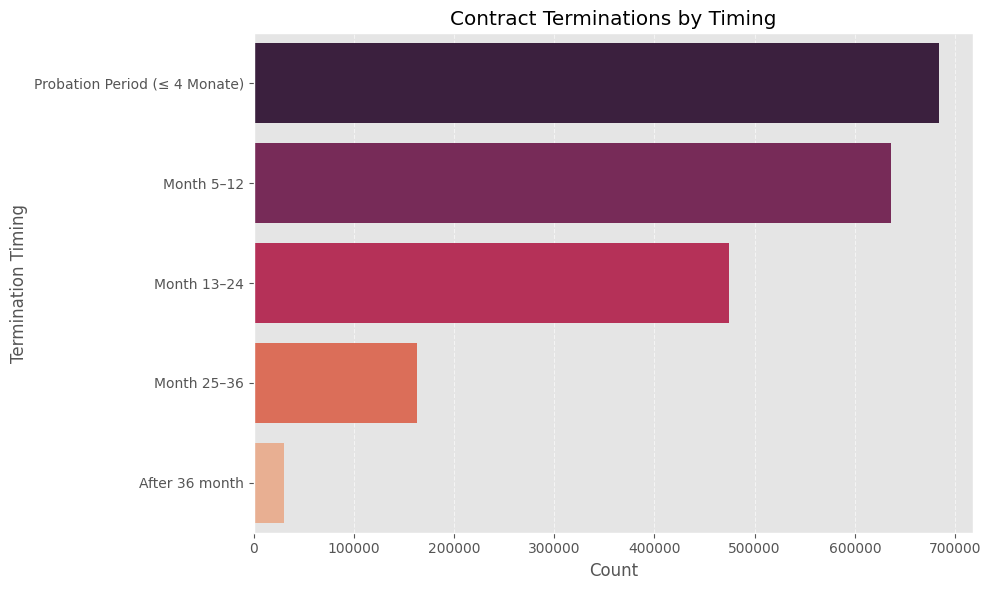

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=zeit_df, x="Anzahl", y="Abbruchzeitpunkt", palette="rocket")

plt.title("Contract Terminations by Timing")
plt.xlabel("Count")
plt.ylabel("Termination Timing")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Timing of Dropouts

Most dropouts occur within the first 12 months, especially during the probation period (≤4 months).

# Contract Terminations by Timing

The bar chart illustrates the distribution of early contract terminations in vocational training based on the **timing of the dropout**.

---

## Key Observations:

- The **highest number of dropouts** occurs **during the probation period** (first 4 months), with nearly **700,000 cases**.
- This is followed by:
  - **Months 5–12**: over **600,000 dropouts**
  - **Months 13–24**: around **480,000**
  - A clear decline in later stages:
    - **Months 25–36**: approx. **160,000**
    - **After 36 months**: very few cases (~30,000)

---

## Insights:

- **More than half of all terminations occur in the first year** of training:
  - Indicates a mismatch between apprentice expectations and real working conditions.
  - Suggests that early onboarding and mentoring may be lacking or insufficient.

- The **sharp decline after year 2** implies that most apprentices who continue beyond this point are likely to **complete their training**.

- The small number of dropouts **after 36 months** confirms that very late exits are rare and likely due to exceptional circumstances (health, personal crises, company insolvency, etc.).

---

## Recommendations:

- Invest in **high-quality onboarding programs** and **expectation management** during the first year.
- Monitor apprentice satisfaction closely **within the first 12 months**.
- Offer structured **mid-term check-ins** (around month 6–9) to catch potential dropouts early.
- Investigate companies or industries with high dropout rates specifically during the probation phase.This suggests that early-stage expectations and real-world work experience often clash, leading to rapid exits.

# Understanding the Estimated Dropout Rate in Our Analysis

## 1. What Is the "Estimated Dropout Rate" and Why Does It Make Sense?

### What Is It?

The estimated dropout rate refers to a proportionally distributed value based on known totals—typically the overall number of early contract terminations.  
We apply this number across subgroups (e.g. age ranges, school qualifications, regions) by assuming that dropouts are distributed proportionally to each group’s share of the total apprentice population.

---

### Why Do We Use It?

In many datasets, we have access to total dropout figures but **not** to a breakdown by subgroup. To still draw meaningful insights, we estimate subgroup-level dropouts using their proportion of total apprenticeships.

This method allows us to:
- Compare dropout tendencies across categories of different sizes.
- Highlight relative risk levels (e.g. by age or education).
- Work transparently with incomplete but meaningful data.
- Enable deeper analysis where only high-level totals are available.

---

### What Should We Be Aware Of?

- This is a **model-based estimation**, not a direct measurement.
- It assumes **uniform dropout probability** within all subgroups, which may oversimplify reality.
- The method should be clearly labeled as an **estimation**.
- We should always be cautious when interpreting small or highly specific subgroups.

---

## 2. How Did We Calculate the Dropout Rate?

### Formula Used

\[
\text{Dropout Rate (%)}
= \frac{\text{Estimated or actual number of dropouts}}{\text{Total number of apprentices in the group}} \times 100
\]

---

### Steps We Followed

1. We calculated the total number of apprentices in each group (e.g. age 18–20).
2. We estimated the number of dropouts for that group by applying its share of the total apprentices to the total dropout count.
3. We applied the formula above to calculate a percentage.

---

### Why This Approach Is Statistically Valid

- It normalizes for group size, enabling **fair comparisons** across demographics or professions.
- It highlights **relative vulnerability**, regardless of absolute numbers.
- The total number of estimated dropouts **matches the real total** by design, keeping the analysis grounded.
- It allows us to perform **targeted analysis** without introducing statistical distortion.

---

### Why These Estimates Correlate with "Vorzeitige Vertragslösungen Insgesamt"

- Each group’s dropout count is derived from the total, using proportional distribution.
- Summing the group estimates returns the overall number of dropouts—by construction.
- This ensures consistency between micro-level analysis and macro-level totals.

# Heatmap

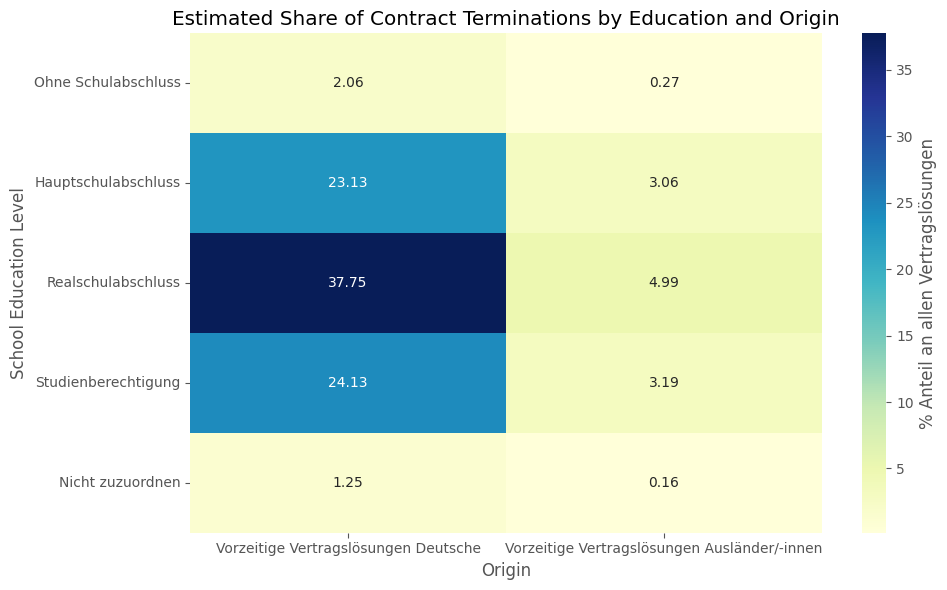

In [ ]:
# better labels for the heatmap
better_labels = {
    "Höchster allgemeinbildender Schulabschluss ohne Hauptschulabschluss": "Ohne Schulabschluss",
    "Höchster allgemeinbildender Schulabschluss mit Hauptschulabschluss": "Hauptschulabschluss",
    "Höchster allgemeinbildender Schulabschluss Realschulabschluss": "Realschulabschluss",
    "Höchster allgemeinbildender Schulabschluss Studienberechtigung": "Studienberechtigung",
    "Höchster allgemeinbildender Schulabschluss nicht zuzuordnen": "Nicht zuzuordnen"
}

# rename index of heatmap
heatmap_data_prozent_renamed = heatmap_data_prozent.rename(index=better_labels)

# make the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data_prozent_renamed,
    annot=True, fmt=".2f", cmap="YlGnBu",
    cbar_kws={'label': '% Anteil an allen Vertragslösungen'}
)

plt.title("Estimated Share of Contract Terminations by Education and Origin")
plt.xlabel("Origin")
plt.ylabel("School Education Level")
plt.tight_layout()
plt.show()

# Estimated Contract Terminations by Education Level and Origin

This heatmap shows the estimated **distribution of early contract terminations** by both **school qualification** and **origin group** (German vs. non-German apprentices). The values reflect the **percentage share** of all contract terminations.

---

## Key Observations:

- The highest share of contract terminations is among apprentices with a **Realschulabschluss (intermediate secondary degree)** and **German origin** (approx. 38%).
- Apprentices with a **Hauptschulabschluss (basic degree)** also account for a significant share, especially among Germans (~23%).
- Apprentices with a **higher education entrance qualification (Studienberechtigung)** contribute to around 24% of dropouts, again mostly among Germans.
- Non-German apprentices make up smaller portions in every education category but show a relatively **even distribution** across Realschule and Studienberechtigung.
- The "not classifiable" education group contributes the least to overall dropouts, likely due to low representation or unclear data entries.

---

## Insights:

- The largest dropout groups are **not necessarily those with the weakest educational background**, but rather the **largest groups overall**.
- Nonetheless, apprentices with **only basic education** (Hauptschule) still represent a **high dropout share**, which supports targeted intervention.
- The relatively small values for non-German apprentices may underrepresent structural challenges due to the estimation method being proportional.

---

## Recommendations:

- Investigate **why Realschule graduates drop out more often**: Are expectations mismatched? Is guidance insufficient?
- Provide **additional support for Hauptschule-level apprentices**, who may struggle with the demands of vocational training.
- Improve data capture for the "not classifiable" group to avoid underreporting and missing patterns.

# Playing around

In [65]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

## Interactive Plot

In [ ]:
# grouping and aggregating by 'Jahr' and 'Herkunft'
plot_df = df.groupby("Jahr")[[
    "Vorzeitige Vertragslösungen Insgesamt",
    "Vorzeitige Vertragslösungen Deutsche",
    "Vorzeitige Vertragslösungen Ausländer/-innen"
]].sum().reset_index()

# for plotting
plot_long = plot_df.melt(id_vars="Jahr", 
                         var_name="Herkunft", 
                         value_name="Vertragslösungen")

In [ ]:
fig = px.line(
    plot_long,
    x="Jahr",
    y="Vertragslösungen",
    color="Herkunft",
    title="Interactive Dropout Trend by Origin Group",
    markers=True
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Contract Terminations",
    legend_title="Origin",
    template="plotly_white"
)

pio.renderers.default = "browser"  # or "notebook_connected" 
fig.show()

## Really palying around interactive Plot

In [ ]:
# only keep relevant columns
beruf_time_df = df.groupby(["Jahr", "Beruf_clean"])[
    "Vorzeitige Vertragslösungen Insgesamt"
].sum().reset_index()

In [ ]:
# list of unique professions
alle_berufe = beruf_time_df["Beruf_clean"].unique()

# initialize the figure
fig = go.Figure()

# data for the initial profession
initial_beruf = alle_berufe[0]
df_init = beruf_time_df[beruf_time_df["Beruf_clean"] == initial_beruf]

fig.add_trace(go.Scatter(
    x=df_init["Jahr"],
    y=df_init["Vorzeitige Vertragslösungen Insgesamt"],
    mode="lines+markers",
    name=initial_beruf
))

# Dropdown-Menu for professions
dropdown_buttons = []

for beruf in alle_berufe:
    visible = [b == beruf for b in alle_berufe]
    df_b = beruf_time_df[beruf_time_df["Beruf_clean"] == beruf]
    
    dropdown_buttons.append(dict(
        method="update",
        label=beruf,
        args=[
            {"y": [df_b["Vorzeitige Vertragslösungen Insgesamt"]],
             "x": [df_b["Jahr"]],
             "type": "scatter"},
            {"title": f"Contract Terminations over Time: {beruf}"}
        ]
    ))

# Update-Menu for the figure
fig.update_layout(
    updatemenus=[dict(
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=1.05,
        y=0.8
    )],
    title=f"Contract Terminations over Time: {initial_beruf}",
    xaxis_title="Year",
    yaxis_title="Number of Contract Terminations",
    template="plotly_white"
)

fig.show()